In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from mlflow.models.signature import infer_signature
#Model
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

#AutoML TPot
from tpot import TPOTRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings


from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from scipy.stats import randint


import sys
import os

# Add the parent directory of 'scripts' to the Python path
sys.path.append(os.path.abspath('../'))

#from scripts.utils  import index2datetime
# from scripts.regression  import plot_ts, error_metrics, train_test_time_split
# from scripts.regression  import seasons, time_of_day, forecast_dates

import warnings
warnings.filterwarnings('ignore')
import mlflow

RSEED = 64

In [14]:
# ROOT_DIR = '../'
# RESULTS_DIR = ROOT_DIR + 'results/Gridsearch/'

In [15]:
df = pd.read_csv('../data/newdata.csv ', index_col=0, parse_dates=True)
df

,energy,dew_point,enth,rel_hum,temp,lab_P051_binary,lab_P015_binary,lab_P011_binary,lab_251102_binary,WorkDay,...,year,hour,day,day_of_year,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,month_sin,month_cos
time,,,,,,,,,,,,,,,,,,,,,
2022-03-26 13:00:00,2119.671269,4.128571,34.430769,32.103774,21.378571,0.0,0.0,0.0,0.0,0,...,2022,13,26,85,-0.974928,-0.222521,-0.258819,-9.659258e-01,1.000000,6.123234e-17
2022-03-26 14:00:00,1342.000000,3.115385,33.660000,29.877628,21.461538,0.0,0.0,0.0,0.0,0,...,2022,14,26,85,-0.974928,-0.222521,-0.500000,-8.660254e-01,1.000000,6.123234e-17
2022-03-26 15:00:00,1431.000000,1.666667,29.517972,28.074964,20.720000,0.0,0.0,0.0,0.0,0,...,2022,15,26,85,-0.974928,-0.222521,-0.707107,-7.071068e-01,1.000000,6.123234e-17
2022-03-26 16:00:00,1454.000000,0.909091,29.517972,26.885974,20.650000,0.0,0.0,0.0,0.0,0,...,2022,16,26,85,-0.974928,-0.222521,-0.866025,-5.000000e-01,1.000000,6.123234e-17
2022-03-26 17:00:00,1555.000000,0.440000,30.100000,26.701900,20.142857,0.0,0.0,0.0,0.0,0,...,2022,17,26,85,-0.974928,-0.222521,-0.965926,-2.588190e-01,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-29 04:00:00,1508.000000,6.266667,24.750000,78.980000,9.525000,0.0,0.0,0.0,0.0,0,...,2023,4,29,119,-0.974928,-0.222521,0.866025,5.000000e-01,0.866025,-5.000000e-01
2023-04-29 05:00:00,1502.000000,6.966667,25.583333,80.333333,10.000000,0.0,0.0,0.0,0.0,0,...,2023,5,29,119,-0.974928,-0.222521,0.965926,2.588190e-01,0.866025,-5.000000e-01
2023-04-29 06:00:00,1539.000000,9.308333,30.666667,81.000000,12.291667,0.0,0.0,0.0,0.0,0,...,2023,6,29,119,-0.974928,-0.222521,1.000000,6.123234e-17,0.866025,-5.000000e-01


In [16]:
# df = df.drop(['lab_P051_binary'	,'lab_P015_binary','lab_P011_binary','lab_251102_binary'], axis=1)


In [17]:
print(df.isnull().sum())  # Count of missing values per column
print(df.isnull().values.any())  # Check if any missing values exist

energy               0
dew_point            0
enth                 0
rel_hum              0
temp                 0
lab_P051_binary      0
lab_P015_binary      0
lab_P011_binary      0
lab_251102_binary    0
WorkDay              0
day_of_week          0
month                0
year                 0
hour                 0
day                  0
day_of_year          0
day_of_week_sin      0
day_of_week_cos      0
hour_sin             0
hour_cos             0
month_sin            0
month_cos            0
dtype: int64
False


In [18]:



df['energy1'] = df['energy'].shift(periods=1)
df['energy2'] = df['energy'].shift(periods=2)
df['energy3'] = df['energy'].shift(periods=3)

# Creating lag variables
for i in range(24):
    df['net_load_kW_lag'+str(i+1)] = df['energy'].shift(i+1)
df['net_load_kW_lag168'] = df['energy'].shift(24*7)

# Exogenous variables for yearly, weekly and hourly seasonality
df['year_sin365'] = np.sin(2 * np.pi * df.index.day_of_year / 365)
df['year_cos365'] = np.cos(2 * np.pi * df.index.day_of_year / 365)
df['year_sin365_2'] = np.sin(4 * np.pi * df.index.day_of_year / 365)
df['year_cos365_2'] = np.cos(4 * np.pi * df.index.day_of_year / 365)
df['week_sin365'] = np.sin(2 * np.pi * df.index.day_of_week/7)
df['week_cos365'] = np.cos(2 * np.pi * df.index.day_of_week/7)
df['week_sin365_2'] = np.sin(4 * np.pi * df.index.day_of_week/7)
df['week_cos365_2'] = np.cos(4 * np.pi * df.index.day_of_week/7)
df['hour_sin365'] = np.sin(2 * np.pi * df.index.hour/24)
df['hour_cos365'] = np.cos(2 * np.pi * df.index.hour/24) 
df['hour_sin365_2'] = np.sin(4 * np.pi * df.index.hour/24)
df['hour_cos365_2'] = np.cos(4 * np.pi * df.index.hour/24) 

# # Shift predicted weather values by 24hr


# #'temp', 'lab_P051_binary', 'lab_P015_binary',
#  #      'lab_P011_binary',

# # df['glob_irrad_in_diffuse_shift'] = df['glob_irrad_in_diffuse'].shift(periods=24)
# # df['glob_irrad_total_disc_shift'] = df['glob_irrad_total_disc'].shift(periods=24)
# df['dew_point_shift'] = df['dew_point'].shift(periods=24)
# df['enth_shift'] = df['enth'].shift(periods=24)
# df['rel_hum_shift'] = df['rel_hum'].shift(periods=24)
# df['temp_shift'] = df['temp'].shift(periods=24)
# df['lab_P011_binary_shift']=df['lab_P011_binary'].shift(periods=24)
# df['lab_P015_binary_shift']=df['lab_P015_binary'].shift(periods=24)
# df['lab_P051_binary_shift']=df['lab_P051_binary'].shift(periods=24)

df = df.dropna()
df.head()

,energy,dew_point,enth,rel_hum,temp,lab_P051_binary,lab_P015_binary,lab_P011_binary,lab_251102_binary,WorkDay,...,year_sin365_2,year_cos365_2,week_sin365,week_cos365,week_sin365_2,week_cos365_2,hour_sin365,hour_cos365,hour_sin365_2,hour_cos365_2
time,,,,,,,,,,,,,,,,,,,,,
2022-04-02 13:00:00,1358.0,2.811765,17.442857,81.425676,5.668421,0.0,0.0,0.0,0.0,0,...,-0.025818,-0.999667,-0.974928,-0.222521,0.433884,-0.900969,-0.258819,-0.965926,0.500000,8.660254e-01
2022-04-02 14:00:00,1616.0,2.300000,16.544444,80.655009,5.533333,0.0,0.0,0.0,0.0,0,...,-0.025818,-0.999667,-0.974928,-0.222521,0.433884,-0.900969,-0.500000,-0.866025,0.866025,5.000000e-01
2022-04-02 15:00:00,1449.0,1.987500,15.600000,80.341049,4.887500,0.0,0.0,0.0,0.0,0,...,-0.025818,-0.999667,-0.974928,-0.222521,0.433884,-0.900969,-0.707107,-0.707107,1.000000,1.194340e-15
2022-04-02 16:00:00,1664.0,0.930769,14.033333,80.155864,4.272727,0.0,0.0,0.0,0.0,0,...,-0.025818,-0.999667,-0.974928,-0.222521,0.433884,-0.900969,-0.866025,-0.500000,0.866025,-5.000000e-01
2022-04-02 17:00:00,1548.0,-1.450000,10.500000,79.970679,1.600000,0.0,0.0,0.0,0.0,0,...,-0.025818,-0.999667,-0.974928,-0.222521,0.433884,-0.900969,-0.965926,-0.258819,0.500000,-8.660254e-01


In [19]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow paper")

2025/06/24 15:55:15 INFO mlflow.tracking.fluent: Experiment with name 'MLflow paper' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/878673487424247258', creation_time=1750773315455, experiment_id='878673487424247258', last_update_time=1750773315455, lifecycle_stage='active', name='MLflow paper', tags={}>

In [20]:
# Splitting the target and features
Y = df.iloc[:, 0]       # First column as target
X = df.iloc[:, 1:]      # All columns from index 1 onward as features

In [21]:
print("Y shape:", Y.shape)           # Should be (number_of_rows,)
print("Y sample values:\n", Y.head())  # Show first few target values

print("X shape:", X.shape)           # Should be (number_of_rows, number_of_features)
print("X columns:\n", X.columns)     # List of column names in X

print("X sample data:\n", X.head()) # Show first few rows of feature data


Y shape: (9394,)
Y sample values:
 time
2022-04-02 13:00:00    1358.0
2022-04-02 14:00:00    1616.0
2022-04-02 15:00:00    1449.0
2022-04-02 16:00:00    1664.0
2022-04-02 17:00:00    1548.0
Name: energy, dtype: float64
X shape: (9394, 61)
X columns:
 Index(['dew_point', 'enth', 'rel_hum', 'temp', 'lab_P051_binary',
       'lab_P015_binary', 'lab_P011_binary', 'lab_251102_binary', 'WorkDay',
       'day_of_week', 'month', 'year', 'hour', 'day', 'day_of_year',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos',
       'month_sin', 'month_cos', 'energy1', 'energy2', 'energy3',
       'net_load_kW_lag1', 'net_load_kW_lag2', 'net_load_kW_lag3',
       'net_load_kW_lag4', 'net_load_kW_lag5', 'net_load_kW_lag6',
       'net_load_kW_lag7', 'net_load_kW_lag8', 'net_load_kW_lag9',
       'net_load_kW_lag10', 'net_load_kW_lag11', 'net_load_kW_lag12',
       'net_load_kW_lag13', 'net_load_kW_lag14', 'net_load_kW_lag15',
       'net_load_kW_lag16', 'net_load_kW_lag17', 'net_load_kW

In [22]:
# Train & Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10, shuffle=False)

In [23]:
#Linear Model
Lmodel = LinearRegression()
Lmodel.fit(X_train,Y_train)
Lmodel.score(X_test,Y_test)*100

91.69013828557222

In [24]:
#Model Valdiation
#Kfold of Linear model
kfold = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=kfold)

array([0.9116883 , 0.91746112, 0.90411961, 0.90177694, 0.90577842])

In [25]:
# Lasso and Ridge Regression
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(X_train, Y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(X_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - Y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient)

Mean squared Error on test set :  108275.39641043257
            Columns  Coefficient Estimate
0         dew_point         -6.314668e+00
1              enth          1.929833e+00
2           rel_hum          5.354972e-01
3              temp         -1.626677e-01
4   lab_P051_binary          1.289186e+02
..              ...                   ...
56    week_cos365_2          2.832027e+01
57      hour_sin365          4.476720e+11
58      hour_cos365         -9.800520e+11
59    hour_sin365_2         -3.695322e+01
60    hour_cos365_2         -1.191205e+01

[61 rows x 2 columns]


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

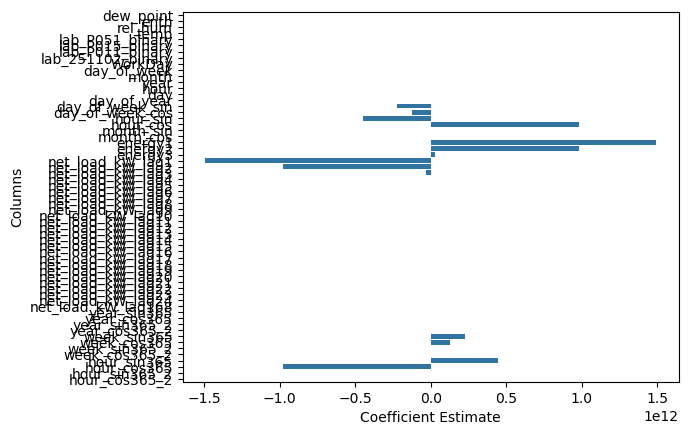

In [26]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)


In [27]:
# Ridge regression 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, Y_train) 
y_pred = ridgeR.predict(X_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2) 
print("Mean_Squared_error:",mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

Mean_Squared_error: 109738.029027739
            Columns  Coefficient Estimate
0         dew_point             -6.401099
1              enth              1.924741
2           rel_hum              0.558864
3              temp             -0.138106
4   lab_P051_binary            127.995923
..              ...                   ...
56    week_cos365_2             28.288558
57      hour_sin365             -1.955122
58      hour_cos365            -36.195015
59    hour_sin365_2            -36.936213
60    hour_cos365_2            -11.915563

[61 rows x 2 columns]


In [28]:
# Lasso Regression
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, Y_train) 
y_pred1 = lasso.predict(X_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - Y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff)

Mean squared error on test set 109854.63625001314
            Columns  Coefficient Estimate
0         dew_point             -4.515367
1              enth              1.754095
2           rel_hum              0.337711
3              temp             -0.000000
4   lab_P051_binary            120.276803
..              ...                   ...
56    week_cos365_2             23.399530
57      hour_sin365              0.000000
58      hour_cos365             -1.255158
59    hour_sin365_2            -32.757146
60    hour_cos365_2            -10.867934

[61 rows x 2 columns]


In [29]:
#--------------------------------------------Ensempble Technique----------------------------------------
# Decision Tree Regressor
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeRegressor()
num_trees = 100
model = BaggingRegressor(estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.9191920578991086


In [30]:
# Random Forest Regressor
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.8993023641097686


In [31]:
# Adaboost Regressor
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.8666908566302995


In [32]:
#KNN Model
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8221706791182223
{'n_neighbors': 12}


In [33]:
KNN_model = KNeighborsRegressor(n_neighbors=6)
KNN_model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=6)

In [34]:
Y_pred = KNN_model.predict(X_test)
KNN_1 = metrics.explained_variance_score(Y_test,Y_pred)
print("Accuracy:" ,KNN_1)

Accuracy: 0.7509920268000947


In [35]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=10)

    models_and_parameters = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [False]
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        },
        'Lasso': {
            'model': Lasso(max_iter=1000),
            'params': {
                'alpha': [0.01, 0.1, 1],
                'selection': ['cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [5, 10],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100],
                'max_features': [3],
                'max_depth': [10],
                'min_samples_split': [2],
                'min_samples_leaf': [1]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(eval_metric='rmse', verbosity=0, use_label_encoder=False),
            'params': {
                'n_estimators': [100],
                'max_depth': [3, 4],
                'learning_rate': [0.05, 0.1]
            }
        }
    }

    client = MlflowClient()
    results = []

    for name, config in models_and_parameters.items():
        try:
            with mlflow.start_run(run_name=name) as run:
                gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=1)
                gs.fit(X, Y)

                mlflow.log_params(gs.best_params_)
                mlflow.log_metric("best_cv_score", gs.best_score_)
                mlflow.sklearn.log_model(gs.best_estimator_, artifact_path="model")

                # Register the model in the Model Registry
                model_uri = f"runs:/{run.info.run_id}/model"
                registered_model_name = f"{name.replace(' ', '_')}_model"

                client.create_registered_model(registered_model_name)  # Create if not exist
                client.create_model_version(
                    name=registered_model_name,
                    source=model_uri,
                    run_id=run.info.run_id
                )

                results.append({
                    'model': name,
                    'best_score': gs.best_score_,
                    'best_params': gs.best_params_,
                    'registered_model_name': registered_model_name
                })
        except Exception as e:
            print(f"Error with model {name}: {e}")

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'registered_model_name'])


# Example usage:
best_models_df = find_best_model_using_gridsearchcv(X, Y)
print(best_models_df)


2025/06/24 16:09:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Linear_Regression_model, version 1
2025/06/24 16:10:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge_model, version 1
2025/06/24 16:10:40 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lasso_model, version 1
2025/06/24 16:11:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision_Tree_model, version 1
2025/06/24 16:11:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random_Forest_model, version 1
2025/06/24 16:12:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation.

               model  best_score  \
0  Linear Regression    0.914856   
1              Ridge    0.914809   
2              Lasso    0.914842   
3      Decision Tree    0.916205   
4      Random Forest    0.903282   
5            XGBoost    0.941792   

                                         best_params    registered_model_name  
0        {'fit_intercept': False, 'positive': False}  Linear_Regression_model  
1                                       {'alpha': 1}              Ridge_model  
2              {'alpha': 0.1, 'selection': 'cyclic'}              Lasso_model  
3  {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...      Decision_Tree_model  
4  {'max_depth': 10, 'max_features': 3, 'min_samp...      Random_Forest_model  
5  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...            XGBoost_model  


In [36]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# import pandas as pd

# def find_best_model_using_gridsearchcv(X, Y):
#     # Conservative CV to reduce memory/time load
#     cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=10)

#     models_and_parameters = {
#         'Linear Regression': {
#             'model': LinearRegression(),
#             'params': {
#                 'fit_intercept': [True, False],
#                 'positive': [False]  # Avoid True as it adds constraint overhead
#             }
#         },
#         'Ridge': {
#             'model': Ridge(),
#             'params': {
#                 'alpha': [0.1, 1, 10]
#             }
#         },
#         'Lasso': {
#             'model': Lasso(max_iter=1000),
#             'params': {
#                 'alpha': [0.01, 0.1, 1],
#                 'selection': ['cyclic']  # 'random' can be unstable
#             }
#         },
#         'Decision Tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'max_depth': [5, 10],
#                 'min_samples_split': [2, 5],
#                 'min_samples_leaf': [1, 2]
#             }
#         },
#         'Random Forest': {
#             'model': RandomForestRegressor(),
#             'params': {
#                 'n_estimators': [100],  # Avoid 200+ on low-RAM systems
#                 'max_features': [3],
#                 'max_depth': [10],
#                 'min_samples_split': [2],
#                 'min_samples_leaf': [1]
#             }
#         },
#         'XGBoost': {
#             'model': XGBRegressor(eval_metric='rmse', verbosity=0, use_label_encoder=False),
#             'params': {
#                 'n_estimators': [100],  # Keep it light
#                 'max_depth': [3, 4],
#                 'learning_rate': [0.05, 0.1]
#             }
#         }
#     }

#     results = []
#     for name, config in models_and_parameters.items():
#         try:
#             gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=1)
#             gs.fit(X, Y)
#             results.append({
#                 'model': name,
#                 'best_score': gs.best_score_,
#                 'best_params': gs.best_params_
#             })
#         except Exception as e:
#             print(f"Error with model {name}: {e}")

#     return pd.DataFrame(results, columns=['model', 'best_score', 'best_params'])

# # Example usage:
# best_models_df = find_best_model_using_gridsearchcv(X, Y)
# print(best_models_df)


NameError: name 'best_model_name' is not defined

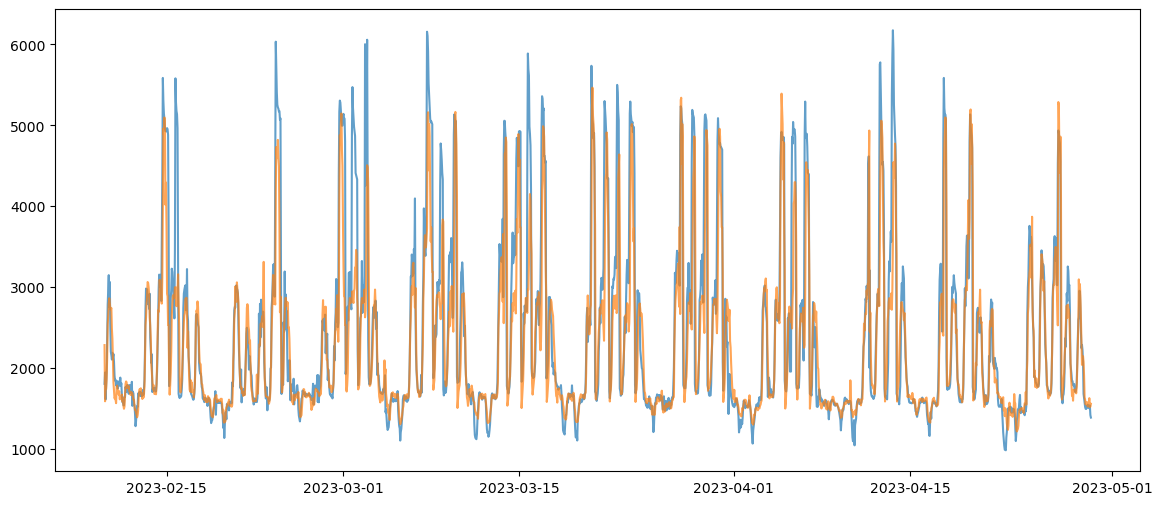

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Y_pred (numpy array) to a Pandas Series with same index as Y_test
Y_pred_series = pd.Series(Y_pred, index=Y_test.index)

# Define your y-axis limits (adjust these values as needed)
min_value = 500    # example min electricity consumption
max_value = 6500   # example max electricity consumption

plt.figure(figsize=(14,6))
plt.plot(Y_test.index, Y_test, label='Actual', alpha=0.7)
plt.plot(Y_pred_series.index, Y_pred_series, label='Predicted', alpha=0.7)
plt.title(f'Hourly Electricity Demand Forecast – {best_model_name}')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.grid(True)
plt.ylim(min_value, max_value)  # Set fixed y-axis limits
plt.tight_layout()
plt.show()


In [ ]:
# #Best Model For Deployment
# #XGBoost

# gb_model = XGBRegressor(n_estimators=250,learning_rate=0.2, max_depth=5)
# gb_model.fit(X_train,Y_train)
# gb_model.score(X_test,Y_test)*100

85.26980017926358

In [ ]:
# import pickle
# pickle_out = open('gb_model.pkl','wb')
# pickle.dump(gb_model,pickle_out)
# pickle_out.close()

In [ ]:
# # -----------------------Random Forest

# rf_model = RandomForestRegressor(n_estimators=10, random_state=20)
# rf_model.fit(X_train,Y_train)
# rf_model.score(X_test,Y_test)*100

In [ ]:
# #-----------------------Pickling the File

# pickle_out = open('rf_model.pkl','wb')
# pickle.dump(rf_model,pickle_out)
# pickle_out.close()